In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
letter = pd.read_csv("/content/drive/MyDrive/ml/19-12-22/datasets/letter-recognition.csv")
letter

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
labels = np.array(letter)[:,0]
k=len(set(labels))
print(k)
print(len(labels))

26
20000


In [ ]:
data=letter.drop("A",axis=1)
data

,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
ionoarr= np.array(data)
ionoarr

array([[ 2,  8,  3, ...,  8,  0,  8],
       [ 5, 12,  3, ...,  8,  4, 10],
       [ 4, 11,  6, ...,  7,  3,  9],
       ...,
       [ 6,  9,  6, ..., 12,  2,  4],
       [ 2,  3,  4, ...,  9,  5,  8],
       [ 4,  9,  6, ...,  7,  2,  8]])

In [ ]:
def kmean(a):
  b=np.sort(a)
  cluster=[]
  med=[]
  alt=0
  for i in range(2,k+1):
    alt=alt+1
    med.append(np.percentile(a,100*1*alt/k))
  med.sort()
  x=0
  y=0
  for j in range(len(b)):
    if(b[j]>med[x]):
      cluster.append(b[y:j])
      y=j
      x=x+1
      if(x>k-2):
        break
  cluster.append(b[y:])  
  centroid=[0 for i in range(k)]
  sse=0
  for i in range(len(cluster)):
    centroid[i]=np.median(cluster[i])
    #print(np.sum(np.absolute((centroid[i]-cluster[i])**2)))
    sse=sse+np.sum((centroid[i]-cluster[i])**2)
  #print(sse)
  #print(centroid)
  return sse/k
l=[]
sseval=[]
for i in range(len(ionoarr[0])):
  if(len(set(ionoarr[:,i]))<5):
    l.append([np.NaN,i])
  else:
    sseval.append(kmean(ionoarr[:,i]))
    l.append([kmean(ionoarr[:,i]),i])
l.sort()
print(l)
print(len(l))
threshold = (np.nanmin(sseval)+np.nanmax(sseval))/2
threshold
threshlist=[]#removed null values from list
for i in range(len(l)):
  if(l[i][0]==np.NaN):
    continue
  else:
    if(l[i][1]<len(l)+1):
      threshlist.append(l[i])
print(threshlist)
sixtyper=[]
ans=[]
for i in range(int(len(threshlist)*0.6)):
  sixtyper.append(threshlist[i])
  ans.append(threshlist[i][0])
print(sixtyper)
print(len(sixtyper))

[[16.03846153846154, 14], [32.15384615384615, 0], [34.15384615384615, 12], [34.88461538461539, 4], [41.46153846153846, 6], [45.88461538461539, 11], [46.53846153846154, 1], [53.73076923076923, 10], [60.76923076923077, 2], [65.73076923076923, 15], [66.53846153846153, 3], [70.88461538461539, 13], [82.73076923076923, 7], [94.38461538461539, 8], [126.73076923076923, 5], [238.96153846153845, 9]]
16
[[16.03846153846154, 14], [32.15384615384615, 0], [34.15384615384615, 12], [34.88461538461539, 4], [41.46153846153846, 6], [45.88461538461539, 11], [46.53846153846154, 1], [53.73076923076923, 10], [60.76923076923077, 2], [65.73076923076923, 15], [66.53846153846153, 3], [70.88461538461539, 13], [82.73076923076923, 7], [94.38461538461539, 8], [126.73076923076923, 5], [238.96153846153845, 9]]
[[16.03846153846154, 14], [32.15384615384615, 0], [34.15384615384615, 12], [34.88461538461539, 4], [41.46153846153846, 6], [45.88461538461539, 11], [46.53846153846154, 1], [53.73076923076923, 10], [60.7692307692

In [ ]:
for i in sixtyper:
  i.append(data.columns[[i[1]][0]])
print(sixtyper)

[[16.03846153846154, 14, 'P'], [32.15384615384615, 0, 'B'], [34.15384615384615, 12, 'N'], [34.88461538461539, 4, 'F'], [41.46153846153846, 6, 'H'], [45.88461538461539, 11, 'M'], [46.53846153846154, 1, 'C'], [53.73076923076923, 10, 'L'], [60.76923076923077, 2, 'D']]


In [ ]:
xy=pd.DataFrame()
for i in sixtyper:
  xy[data.columns[i[1]]]=data[data.columns[i[1]]]
xy

,P,B,N,F,H,M,C,L,D
0,0,2,0,1,13,8,8,10,3
1,4,5,2,2,5,9,12,3,3
2,3,4,3,6,6,7,11,3,6
3,2,7,6,3,9,10,11,4,6
4,5,2,1,1,6,9,1,5,3
...,...,...,...,...,...,...,...,...,...
19995,3,2,2,2,7,4,2,6,3
19996,3,7,2,4,8,13,10,9,8
19997,2,6,2,5,11,5,9,9,6
19998,5,2,1,1,7,8,3,6,4


In [ ]:
correlation_frame=xy.corr()
correlation_frame

,P,B,N,F,H,M,C,L,D
P,1.000000,0.273504,0.108411,0.492653,-0.078008,0.049695,0.230883,-0.226251,0.260285
B,0.273504,1.000000,0.489155,0.619097,0.045545,-0.046333,0.757793,0.035464,0.851514
N,0.108411,0.489155,1.000000,0.627507,-0.036722,-0.008753,0.274431,0.053566,0.557251
F,0.492653,0.619097,0.627507,1.000000,-0.028822,-0.038858,0.555067,-0.072941,0.765716
H,-0.078008,0.045545,-0.036722,-0.028822,1.000000,-0.271649,-0.040925,0.600397,0.024832
M,0.049695,-0.046333,-0.008753,-0.038858,-0.271649,1.000000,-0.007568,0.063214,-0.045009
C,0.230883,0.757793,0.274431,0.555067,-0.040925,-0.007568,1.000000,-0.054648,0.671912
L,-0.226251,0.035464,0.053566,-0.072941,0.600397,0.063214,-0.054648,1.000000,0.011694
D,0.260285,0.851514,0.557251,0.765716,0.024832,-0.045009,0.671912,0.011694,1.000000


In [ ]:
for i in range(len(correlation_frame)):
  for j in range(len(correlation_frame)):
    if(correlation_frame.iloc[i,j]<-0.7 or correlation_frame.iloc[i,j]>0.7):
      correlation_frame.iloc[i,j]=None
correlation_frame

,P,B,N,F,H,M,C,L,D
P,NaN,0.273504,0.108411,0.492653,-0.078008,0.049695,0.230883,-0.226251,0.260285
B,0.273504,NaN,0.489155,0.619097,0.045545,-0.046333,NaN,0.035464,NaN
N,0.108411,0.489155,NaN,0.627507,-0.036722,-0.008753,0.274431,0.053566,0.557251
F,0.492653,0.619097,0.627507,NaN,-0.028822,-0.038858,0.555067,-0.072941,NaN
H,-0.078008,0.045545,-0.036722,-0.028822,NaN,-0.271649,-0.040925,0.600397,0.024832
M,0.049695,-0.046333,-0.008753,-0.038858,-0.271649,NaN,-0.007568,0.063214,-0.045009
C,0.230883,NaN,0.274431,0.555067,-0.040925,-0.007568,NaN,-0.054648,0.671912
L,-0.226251,0.035464,0.053566,-0.072941,0.600397,0.063214,-0.054648,NaN,0.011694
D,0.260285,NaN,0.557251,NaN,0.024832,-0.045009,0.671912,0.011694,NaN


In [ ]:
drop=[]
for i in range(len(correlation_frame)):
  l=np.array(correlation_frame[correlation_frame.columns[i:i+1]])
  if(np.count_nonzero(np.isnan(l))>2):
    drop.append(correlation_frame.columns[i:i+1][0])
    break
len(drop)
drop

['B']

In [ ]:
eliminated=xy.drop(drop,axis=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [ ]:
clf.fit(eliminated[eliminated.columns[0:len(eliminated.columns)]],labels)

GaussianNB()

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
accur=[]
for i in range(1,len(eliminated.columns)):  
  X_train, X_test, y_train, y_test = train_test_split(eliminated[eliminated.columns[0:i]],labels , test_size=0.4, random_state=0)
  
  gnb = GaussianNB()
  gnb.fit(X_train, y_train)
  
# making predictions on the testing set
  y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
  
  print("Gaussian Naive Bayes model accuracy(in %) for",i+1,"features", metrics.accuracy_score(y_test, y_pred)*100)
  accur.append([metrics.accuracy_score(y_test, y_pred)*100,str(i)+"features",[eliminated.columns[j:j+1][0] for j in range(i+1)]])
print(accur)
print(len(accur))

Gaussian Naive Bayes model accuracy(in %) for 2 features 10.212499999999999
Gaussian Naive Bayes model accuracy(in %) for 3 features 21.25
Gaussian Naive Bayes model accuracy(in %) for 4 features 21.675
Gaussian Naive Bayes model accuracy(in %) for 5 features 33.7875
Gaussian Naive Bayes model accuracy(in %) for 6 features 47.05
Gaussian Naive Bayes model accuracy(in %) for 7 features 47.0
Gaussian Naive Bayes model accuracy(in %) for 8 features 50.787499999999994
[[10.212499999999999, '1features', ['P', 'N']], [21.25, '2features', ['P', 'N', 'F']], [21.675, '3features', ['P', 'N', 'F', 'H']], [33.7875, '4features', ['P', 'N', 'F', 'H', 'M']], [47.05, '5features', ['P', 'N', 'F', 'H', 'M', 'C']], [47.0, '6features', ['P', 'N', 'F', 'H', 'M', 'C', 'L']], [50.787499999999994, '7features', ['P', 'N', 'F', 'H', 'M', 'C', 'L', 'D']]]
7


In [ ]:
from collections import Counter
import math
def entropy(labels):
    entropy=0
    label_counts = Counter(labels)
    for label in label_counts:
        prob_of_label = label_counts[label] / len(labels)
        entropy -= prob_of_label * math.log2(prob_of_label)
    return entropy

def information_gain(starting_labels, split_labels):
    info_gain = entropy(starting_labels)
    for branched_subset in split_labels:
        info_gain -= len(branched_subset) * entropy(branched_subset) / len(starting_labels)
    return info_gain

In [ ]:
def split(dataset, column):
    split_data = []
    col_vals = data[column].unique() # This tree generation method only works with discrete values
    for col_val in col_vals:
        split_data.append(dataset[dataset[column] == col_val])
    return(split_data)
l=[]
def find_best_split(dataset):
    best_gain = 0
    best_feature = 0
    features = list(dataset.columns)
    features.remove('B')
    for feature in features:
        split_data = split(dataset, feature)
        split_labels = [dataframe['B'] for dataframe in split_data]
        gain = information_gain(dataset['B'], split_labels)
        l.append([gain,data.columns.get_loc(feature)])
        if gain > best_gain:
            best_gain, best_feature = gain, feature
    print(best_feature, best_gain)
    return best_feature, best_gain

new_data = split(data, find_best_split(data)[0]) # contains a list of dataframes after splitting
print(l)
l.sort()

D 1.1938893179645544
[[0.7278095793211807, 1], [1.1938893179645544, 2], [0.5998706531209033, 3], [0.6679608396384572, 4], [0.055874137594110244, 5], [0.058519728932414875, 6], [0.07940357377653129, 7], [0.052770776612264716, 8], [0.10459260827235399, 9], [0.08181979085385599, 10], [0.0384609571025749, 11], [0.27893030142142433, 12], [0.07168518984673848, 13], [0.10857429072506702, 14], [0.08891915368945334, 15]]


In [ ]:
l.sort()
l.reverse()
print(l)

[[1.1938893179645544, 2], [0.7278095793211807, 1], [0.6679608396384572, 4], [0.5998706531209033, 3], [0.27893030142142433, 12], [0.10857429072506702, 14], [0.10459260827235399, 9], [0.08891915368945334, 15], [0.08181979085385599, 10], [0.07940357377653129, 7], [0.07168518984673848, 13], [0.058519728932414875, 6], [0.055874137594110244, 5], [0.052770776612264716, 8], [0.0384609571025749, 11]]


In [ ]:
xyz=pd.DataFrame()
for i in l:
  xyz[data[data.columns[i[1]:i[1]+1]].columns[0]]=data[data.columns[i[1]:i[1]+1]]
xyz

,D,C,F,E,N,P,K,Q,L,I,O,H,G,J,M
0,3,8,1,5,0,0,6,8,10,0,8,13,8,6,8
1,3,12,2,7,2,4,13,10,3,5,8,5,10,4,9
2,6,11,6,8,3,3,10,9,3,2,7,6,10,6,7
3,6,11,3,6,6,2,4,8,4,4,10,9,5,6,10
4,3,1,1,1,1,5,6,10,5,6,7,6,8,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,2,2,3,2,3,6,7,6,7,8,7,7,6,4
19996,8,10,4,8,2,3,12,7,9,6,9,8,4,9,13
19997,6,9,5,7,2,2,11,4,9,3,12,11,6,7,5
19998,4,3,1,2,1,5,10,8,6,2,9,7,8,6,8


In [ ]:
accur1=[]
for i in range(1,len(xyz.columns)):  
  X_train, X_test, y_train, y_test = train_test_split(xyz[xyz.columns[0:i]],labels , test_size=0.4, random_state=1)

  gnb = GaussianNB()
  gnb.fit(X_train, y_train)
  
# making predictions on the testing set
  y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
  
  print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
  accur1.append([metrics.accuracy_score(y_test, y_pred)*100,str(i)+"features",[xyz.columns[j:j+1][0] for j in range(i+1)]])
print(accur1)

Gaussian Naive Bayes model accuracy(in %): 7.4624999999999995
Gaussian Naive Bayes model accuracy(in %): 7.062499999999999
Gaussian Naive Bayes model accuracy(in %): 7.9750000000000005
Gaussian Naive Bayes model accuracy(in %): 8.975
Gaussian Naive Bayes model accuracy(in %): 15.024999999999999
Gaussian Naive Bayes model accuracy(in %): 21.7875
Gaussian Naive Bayes model accuracy(in %): 26.8625
Gaussian Naive Bayes model accuracy(in %): 30.725
Gaussian Naive Bayes model accuracy(in %): 38.2875
Gaussian Naive Bayes model accuracy(in %): 47.4875
Gaussian Naive Bayes model accuracy(in %): 52.2625
Gaussian Naive Bayes model accuracy(in %): 54.574999999999996
Gaussian Naive Bayes model accuracy(in %): 56.325
Gaussian Naive Bayes model accuracy(in %): 60.925
[[7.4624999999999995, '1features', ['D', 'C']], [7.062499999999999, '2features', ['D', 'C', 'F']], [7.9750000000000005, '3features', ['D', 'C', 'F', 'E']], [8.975, '4features', ['D', 'C', 'F', 'E', 'N']], [15.024999999999999, '5features'

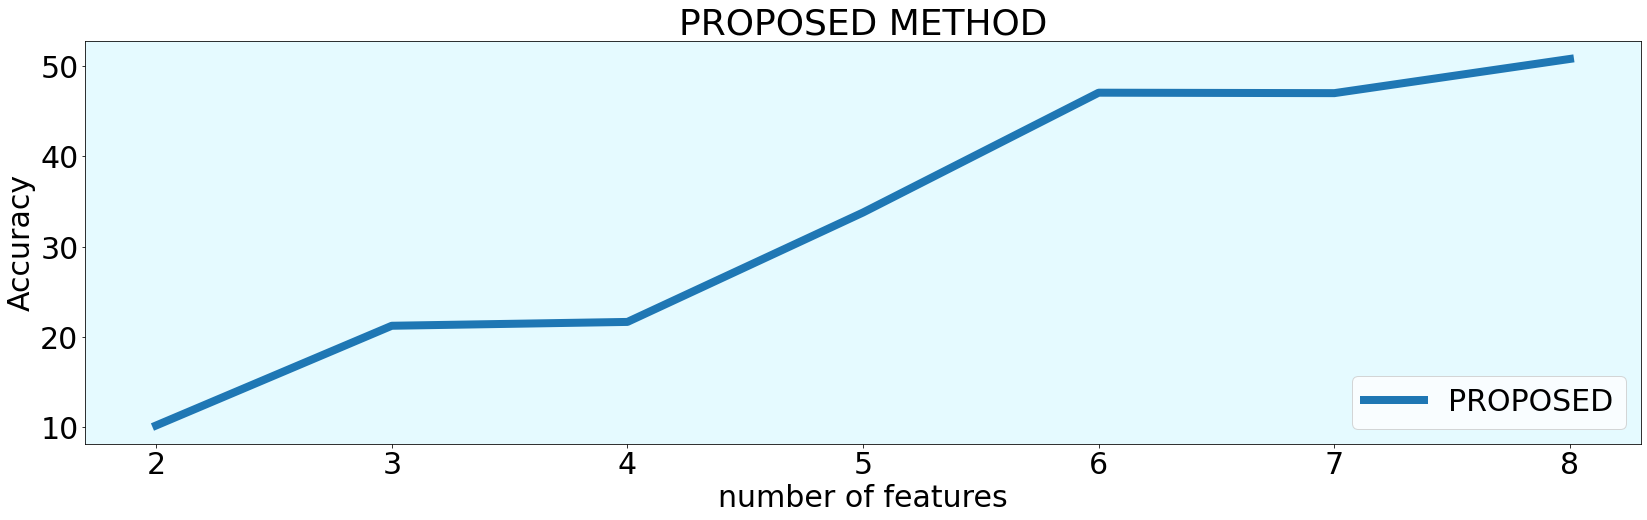

In [ ]:
import matplotlib
plt.rcParams['figure.figsize'] = [27, 7]
matplotlib.rcParams['font.family'] = 'Comic Sans MS'
plt.rc('font', size=30) 
y1=[accur[i][0] for i in range(len(accur))]
x1=[len(accur[i][2]) for i in range(len(accur))]
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x1, y1,linewidth=8, label="PROPOSED")
ax.set_ylabel("Accuracy")
ax.set_xlabel("number of features")
ax.set_title("PROPOSED METHOD")
ax.set_facecolor("#e5faff")
ax.set_xticks([len(accur[i][2]) for i in range(len(accur))])
ax.set_xticklabels([str(len(accur[i][2])) for i in range(len(accur))])
plt.legend(loc='lower right', ncol=1)
plt.show()

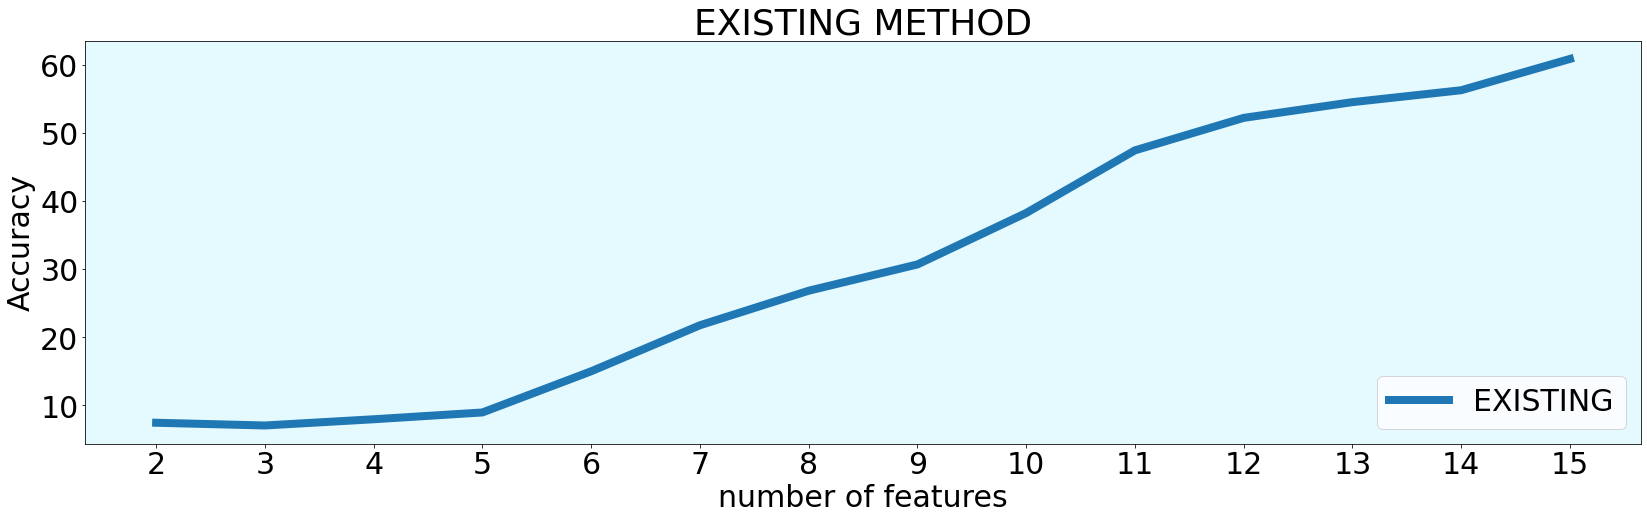

In [ ]:
y2=[accur1[i][0] for i in range(len(accur1))]
x2=[len(accur1[i][2]) for i in range(len(accur1))]
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x2, y2,linewidth=8, label="EXISTING")
ax.set_ylabel("Accuracy")
ax.set_xlabel("number of features")
ax.set_title("EXISTING METHOD")
ax.set_facecolor("#e5faff")
ax.set_xticks([len(accur1[i][2]) for i in range(len(accur1))])
ax.set_xticklabels([str(len(accur1[i][2])) for i in range(len(accur1))])
plt.legend(loc='lower right', ncol=1)
plt.show()

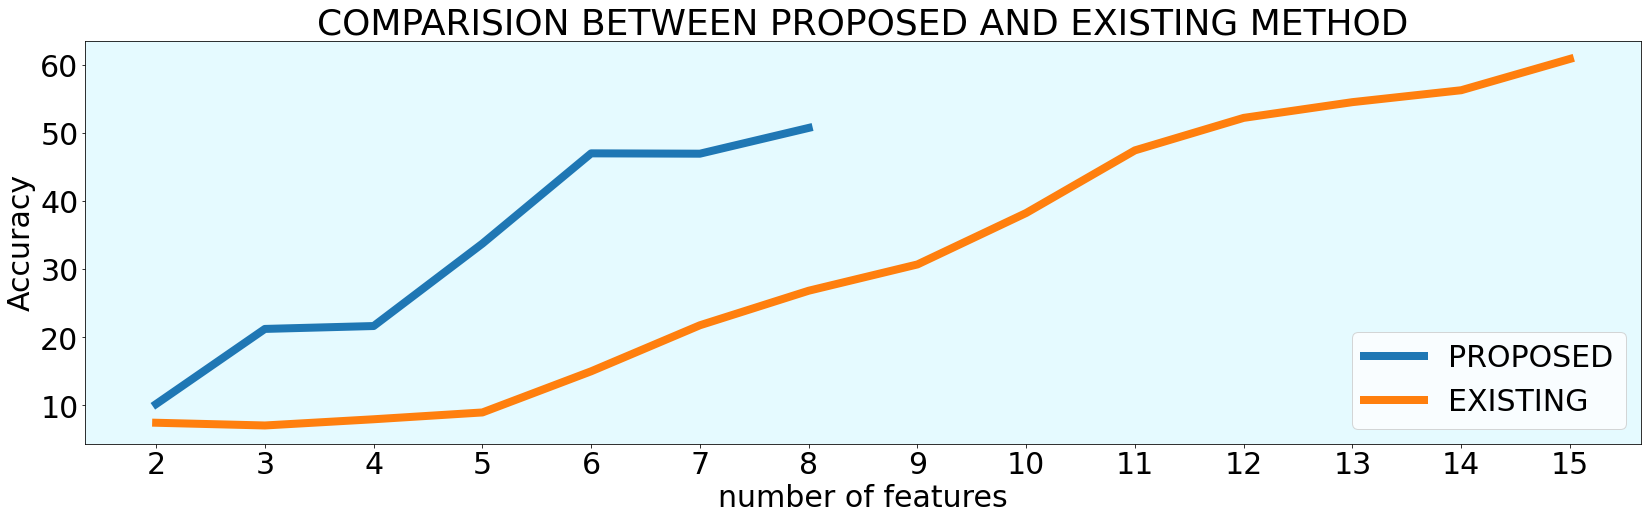

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x1, y1,linewidth=8, label="PROPOSED")
ax.plot(x2, y2,linewidth=8, label="EXISTING")
ax.set_ylabel("Accuracy")
ax.set_xlabel("number of features")
ax.set_title("COMPARISION BETWEEN PROPOSED AND EXISTING METHOD")
ax.set_facecolor("#e5faff")
ax.set_xticks([len(accur1[i][2]) for i in range(len(accur1))])
ax.set_xticklabels([str(len(accur1[i][2])) for i in range(len(accur1))])
plt.legend(loc='lower right', ncol=1)
plt.show()